In [296]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

survey_raw_df = pd.read_csv('C:/python/data/survey_results_public.csv', index_col = 'ResponseId')
schema_raw = pd.read_csv('C:/python/data/survey_results_schema.csv', usecols = ['qname', 'question'], index_col = 'qname')['question']

In [297]:
pd.set_option('display.max_columns', 78)
pd.set_option('display.max_rows', 78)

In [298]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp'
]

In [299]:
survey_df = survey_raw_df[selected_columns].copy()

In [300]:
def count_nan(Series):
    return Series.isna().sum()

count_nan(survey_df['YearsCode'])

1937

In [301]:
survey_df['YearsCode'].replace('Less than 1 year', 0, inplace = True)
survey_df['YearsCode'].replace('More than 50 years', 51, inplace = True)
survey_df['YearsCode'] = survey_df['YearsCode'].astype('float')

In [302]:
survey_df['YearsCodePro'].replace('Less than 1 year', 0, inplace = True)
survey_df['YearsCodePro'].replace('More than 50 years', 51, inplace = True)
survey_df['YearsCodePro'] = survey_df['YearsCodePro'].astype('float')

In [303]:
survey_df[survey_df['Gender'].str.contains(';', na = False) == True]

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
380,Germany,18-24 years old,"Man;Non-binary, genderqueer, or gender non-con...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,1.0,HTML/CSS;Rust,Rust,NaN,NaN,Yes,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",NaN
757,Spain,25-34 years old,"Or, in your own words:;Non-binary, genderqueer...","Other doctoral degree (Ph.D., Ed.D., etc.)",13.0,10.0,Bash/Shell;C;C#;C++;Go;Java;LISP;Python;Ruby;SQL,C#;C++;Crystal;Go;LISP;Perl;Ruby;SQL,NaN,Developer portal or other central places to fi...,No,"Employed, full-time","Developer, back-end;Database administrator;Dat...",9.0
767,Brazil,18-24 years old,"Woman;Non-binary, genderqueer, or gender non-c...",Some college/university study without earning ...,10.0,3.0,Bash/Shell;C;Go;Java;Lua;Python;SQL,Bash/Shell;Lua;Python;SQL,NaN,Microservices;Developer portal or other centra...,No,"Employed, full-time","Developer, back-end;Developer, desktop or ente...",3.0
825,Bangladesh,Under 18 years old,Man;Woman,"Secondary school (e.g. American high school, G...",3.0,NaN,C;Elixir;JavaScript;Lua;TypeScript,C#;Dart;Elixir;Go;TypeScript,Other,NaN,Yes,"Student, full-time",NaN,NaN
896,United States of America,25-34 years old,"Woman;Non-binary, genderqueer, or gender non-c...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,3.0,HTML/CSS;JavaScript;PHP;TypeScript,Rust;TypeScript,NaN,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, full-stack;Developer, back-end",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73073,Hong Kong (S.A.R.),18-24 years old,"Woman;Non-binary, genderqueer, or gender non-c...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7.0,6.0,Bash/Shell;C#;Dart;Go;HTML/CSS;JavaScript;Pyth...,Dart;Go;HTML/CSS;JavaScript;Python;Rust;Solidi...,NaN,DevOps function;Microservices;Continuous integ...,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,3.0
73105,United Kingdom of Great Britain and Northern I...,Under 18 years old,"Woman;Non-binary, genderqueer, or gender non-c...","Secondary school (e.g. American high school, G...",7.0,NaN,Dart;Elixir;Go;HTML/CSS;Java;JavaScript;Kotlin...,Dart;Elixir;Go;HTML/CSS;JavaScript;Kotlin;Pyth...,NaN,NaN,Yes,"Student, full-time",NaN,NaN
73130,United Kingdom of Great Britain and Northern I...,Under 18 years old,"Man;Non-binary, genderqueer, or gender non-con...","Secondary school (e.g. American high school, G...",5.0,NaN,C#;HTML/CSS;JavaScript;Lua;Python,HTML/CSS;JavaScript;Lua;Python,Codecademy;edX,NaN,No,"Student, full-time",NaN,NaN


In [304]:
survey_df.where(~survey_df['Gender'].str.contains(';', na = False), np.nan, inplace = True)

In [305]:
survey_df['Gender'].unique()

array([nan, 'Man', 'Or, in your own words:', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Prefer not to say'], dtype=object)

In [306]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl

# 폰트 파일 다운로드 받아서 경로 설정한 곳에 저장
font_dir = ['C:/python/font'] 
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name()) # 폰트명 확인
    font_manager.fontManager.addfont(font) # 폰트 추가

# get_namem을 통해서 나온 폰트명을 추가
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Serif KR' # 이름 확인 된걸 추가
print(mpl.rcParams['font.family'])

Noto Serif KR
Noto Serif KR
Noto Serif KR
Noto Serif KR
Noto Serif KR
Noto Serif KR
Noto Serif KR
Noto Serif KR
Nanum Pen
Noto Serif KR
Noto Serif KR
Noto Serif KR
Noto Serif KR
Nanum Pen
Noto Serif KR
Noto Serif KR
['Noto Serif KR']


In [307]:
import matplotlib as mpl
%matplotlib inline


sns.set_style('whitegrid')
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (9,5)
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams["font.family"] = 'Noto Serif KR'
mpl.rcParams["axes.unicode_minus"] = False


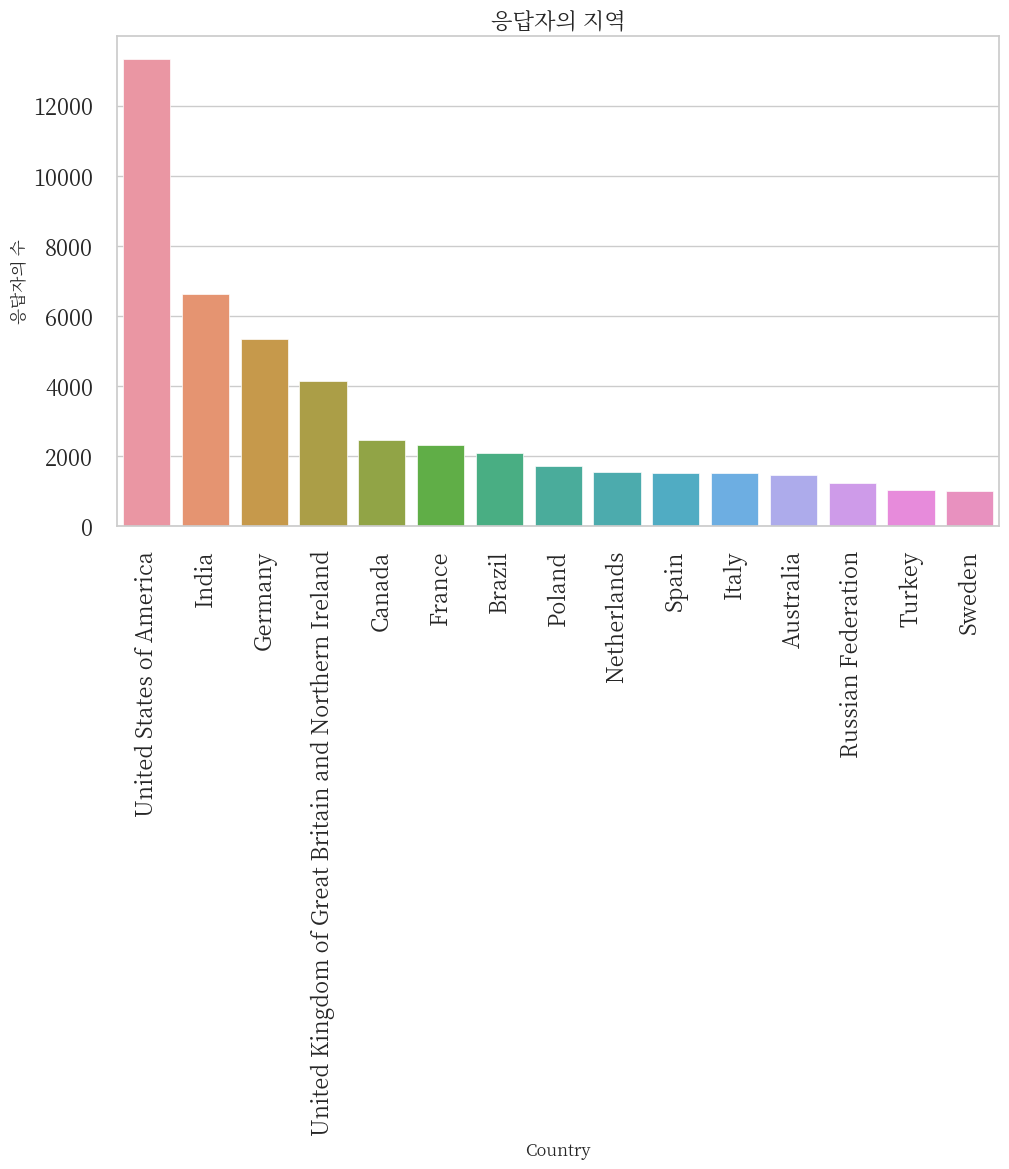

In [308]:
plt.title('응답자의 지역')
sns.countplot(x = 'Country', data = survey_df, order = survey_df['Country'].value_counts().head(15).index)
plt.xticks(rotation = 90)
plt.ylabel('응답자의 수')
plt.show()

In [309]:
survey_df['Age'].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

c:\Users\wjddm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


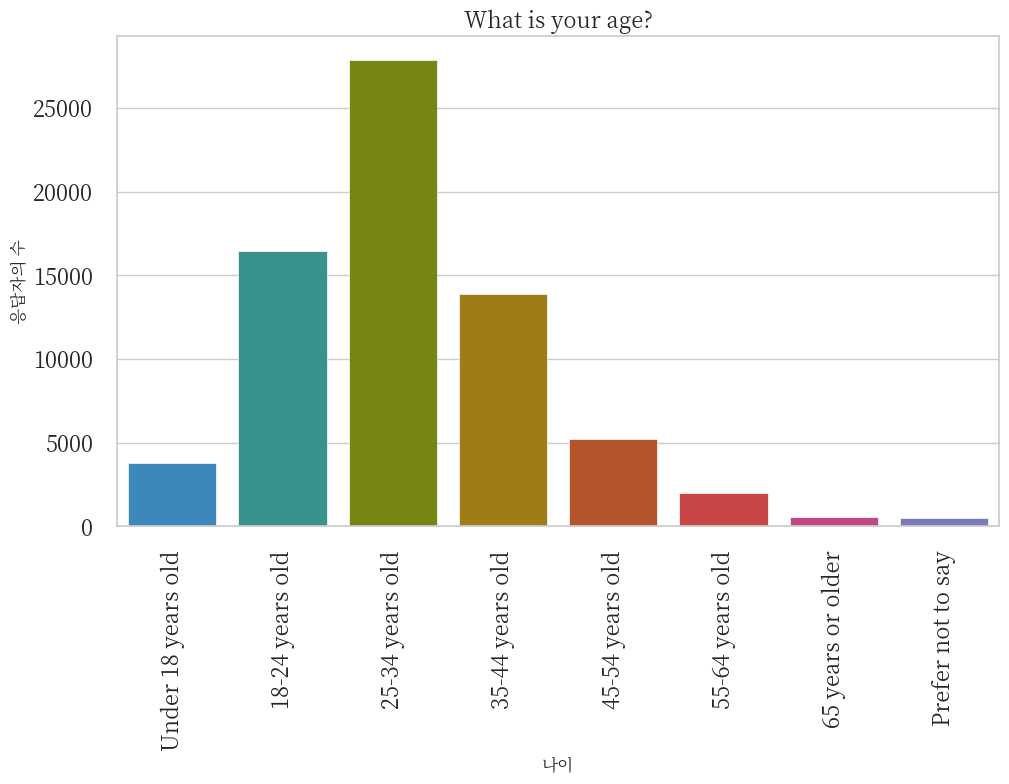

In [310]:
age_order = ['Under 18 years old',
            '18-24 years old',
            '25-34 years old',
            '35-44 years old',
            '45-54 years old',
            '55-64 years old',
            '65 years or older',
            'Prefer not to say']
sns.countplot(survey_df['Age'], order = age_order)
plt.title('What is your age?')
plt.xticks(rotation = 90)
plt.xlabel('나이')
plt.ylabel('응답자의 수')
plt.show()

In [311]:
survey_df.where(~survey_df['Gender'].str.contains(';', na = False), np.nan, inplace = True)

In [312]:
survey_df['Gender'].value_counts(normalize = True).index

Index(['Man', 'Woman', 'Prefer not to say',
       'Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:'],
      dtype='object')

In [313]:
survey_df['Gender'].unique()

array([nan, 'Man', 'Or, in your own words:', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Prefer not to say'], dtype=object)

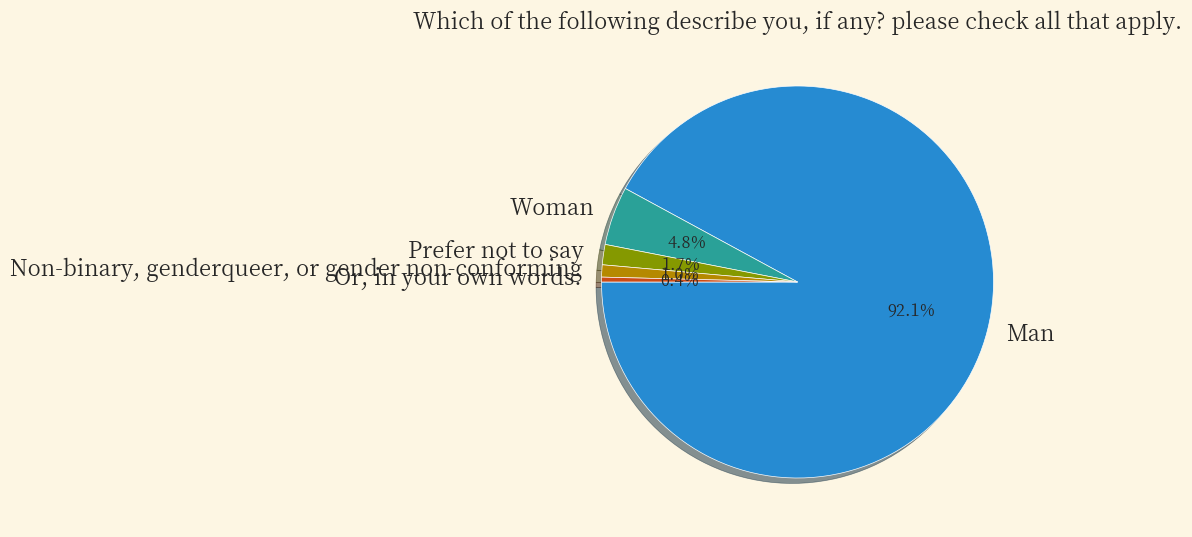

In [315]:
mpl.rcParams['figure.figsize'] = (9,5)
labels = survey_df['Gender'].value_counts(normalize = True).index
value = survey_df['Gender'].value_counts(normalize = True)

plt.title('Which of the following describe you, if any? please check all that apply.')
plt.pie(value ,labels=labels, shadow = True, startangle = 180, autopct='%.1f%%')
# plt.axis('equal')
plt.style.use('Solarize_Light2')
plt.show()

In [316]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


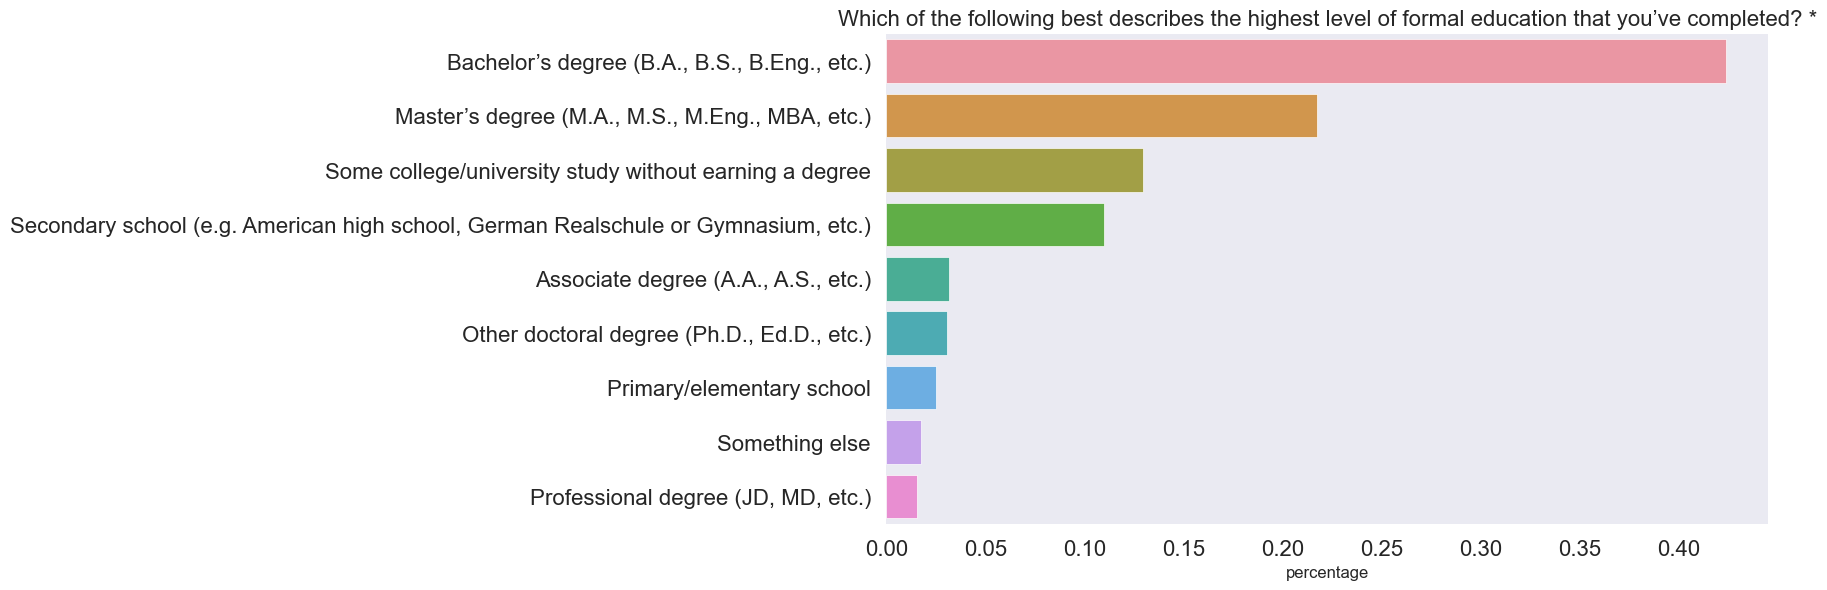

In [343]:
plt.style.use('seaborn-dark')
plt.title(schema_raw['EdLevel'])
sns.barplot(x= survey_df['EdLevel'].value_counts(normalize = True), y = survey_df['EdLevel'].value_counts().index)
plt.xlabel('percentage')
plt.show()

In [345]:
schema_raw['Employment']

'Which of the following best describes your current employment status?'

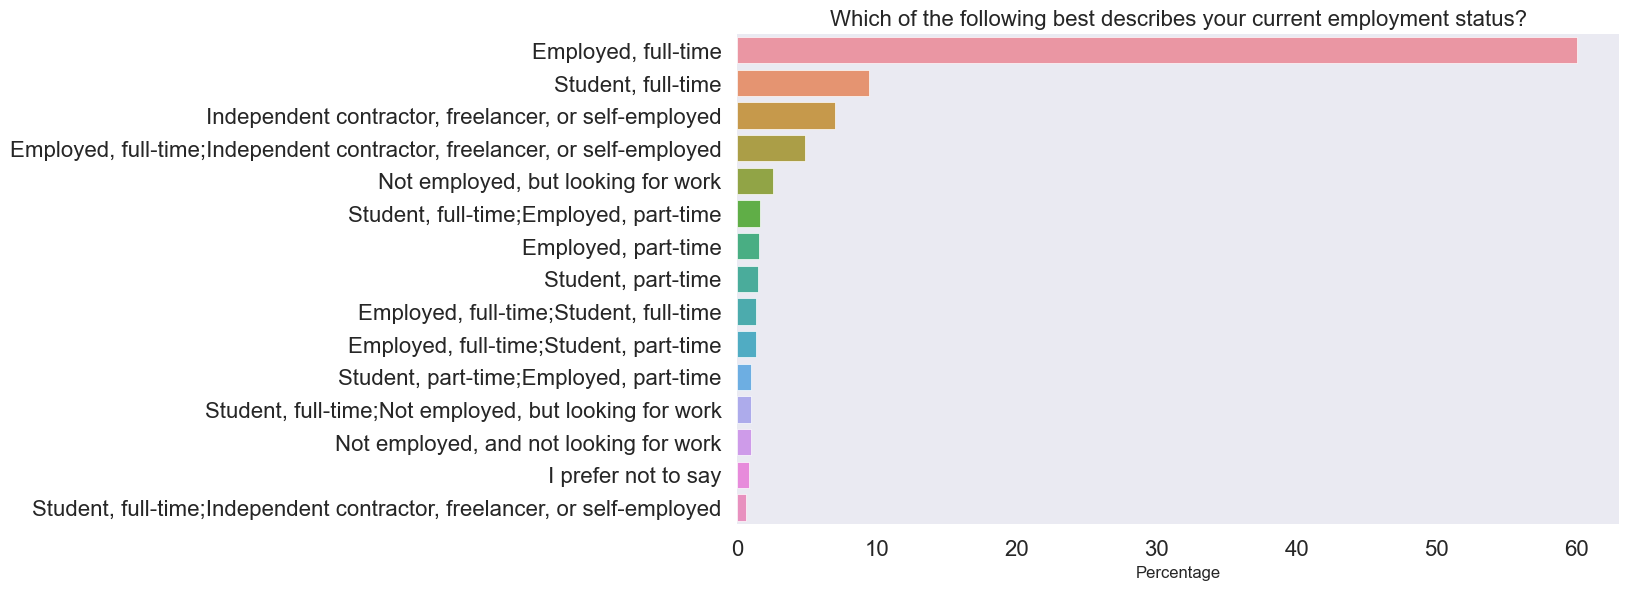

In [354]:
sns.barplot(x = survey_df['Employment'].value_counts(normalize = True).head(15) * 100, y = survey_df['Employment'].value_counts().index[:15])
plt.title(schema_raw['Employment'])
plt.xlabel('Percentage')
plt.ylabel(None)
plt.show()


In [357]:
def dfs(graph, v, visited):
    
    # 현재 노드를 방문처리
    visited[v] = True
    # print(v, end = ' ')
    
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        print(i)
        if not visited[i]:
            dfs(graph, i, visited)

# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)
graph = [
    [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

# 각 노드가 방문된 정보를 리스트 자료형으로 표현(1차원 리스트)
visited = [False] * 9

# 정의된 DFS 함수 호출
dfs(graph, 1, visited)

2
1
7
2
6
7
8
1
7
3
1
4
3
5
3
4
5
8


In [369]:
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14.0,5.0,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20.0,17.0,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,3.0,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,5.0,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.0,5.0,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42.0,33.0,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [419]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = [Series.dropna().str.split(';').str[0].unique()], index = Series.index)
    for idx, rep in Series.str.split(';').items():
        if isinstance(rep, list):
            for one in rep:
                df.loc[idx, one.strip()] = True
        else :
            pass
    return df

split_multicolumn(survey_df['DevType'])

,Data scientist or machine learning specialist,"Developer, full-stack","Developer, front-end","Developer, back-end","Developer, desktop or enterprise applications",Engineering manager,"Engineer, data",Student,Other (please specify):,"Engineer, site reliability","Developer, mobile",Marketing or sales professional,"Developer, embedded applications or devices",DevOps specialist,Designer,Database administrator,System administrator,"Developer, QA or test",Product manager,Project manager,Data or business analyst,"Senior Executive (C-Suite, VP, etc.)",Security professional,Educator,Academic researcher,"Developer, game or graphics",Cloud infrastructure engineer,Scientist,Blockchain
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [437]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    for idx, rep in Series.str.split(';').items():
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
    return df

df = split_multicolumn(survey_df['DevType'])

In [445]:
df.sum().sort_values(ascending= False)

Developer, full-stack                            28433
Developer, back-end                              26369
Developer, front-end                             15739
Developer, desktop or enterprise applications     9451
Developer, mobile                                 7566
DevOps specialist                                 6093
Student                                           5503
Cloud infrastructure engineer                     5215
Database administrator                            4872
System administrator                              4828
Developer, embedded applications or devices       3871
Project manager                                   3844
Designer                                          3712
Engineer, data                                    3558
Engineering manager                               3534
Data scientist or machine learning specialist     3377
Data or business analyst                          3166
Developer, QA or test                             3045
Academic r

In [463]:
len(df)

73268

In [518]:
devtype_percentage = pd.Series(df.sum()/df.sum().sum()).sort_values(ascending= False) * 100

In [522]:
devtype_percentage

Developer, full-stack                            17.462842
Developer, back-end                              16.195185
Developer, front-end                              9.666503
Developer, desktop or enterprise applications     5.804569
Developer, mobile                                 4.646849
DevOps specialist                                 3.742169
Student                                           3.379806
Cloud infrastructure engineer                     3.202923
Database administrator                            2.992261
System administrator                              2.965238
Developer, embedded applications or devices       2.377472
Project manager                                   2.360889
Designer                                          2.279818
Engineer, data                                    2.185235
Engineering manager                               2.170495
Data scientist or machine learning specialist     2.074070
Data or business analyst                          1.9444

In [534]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

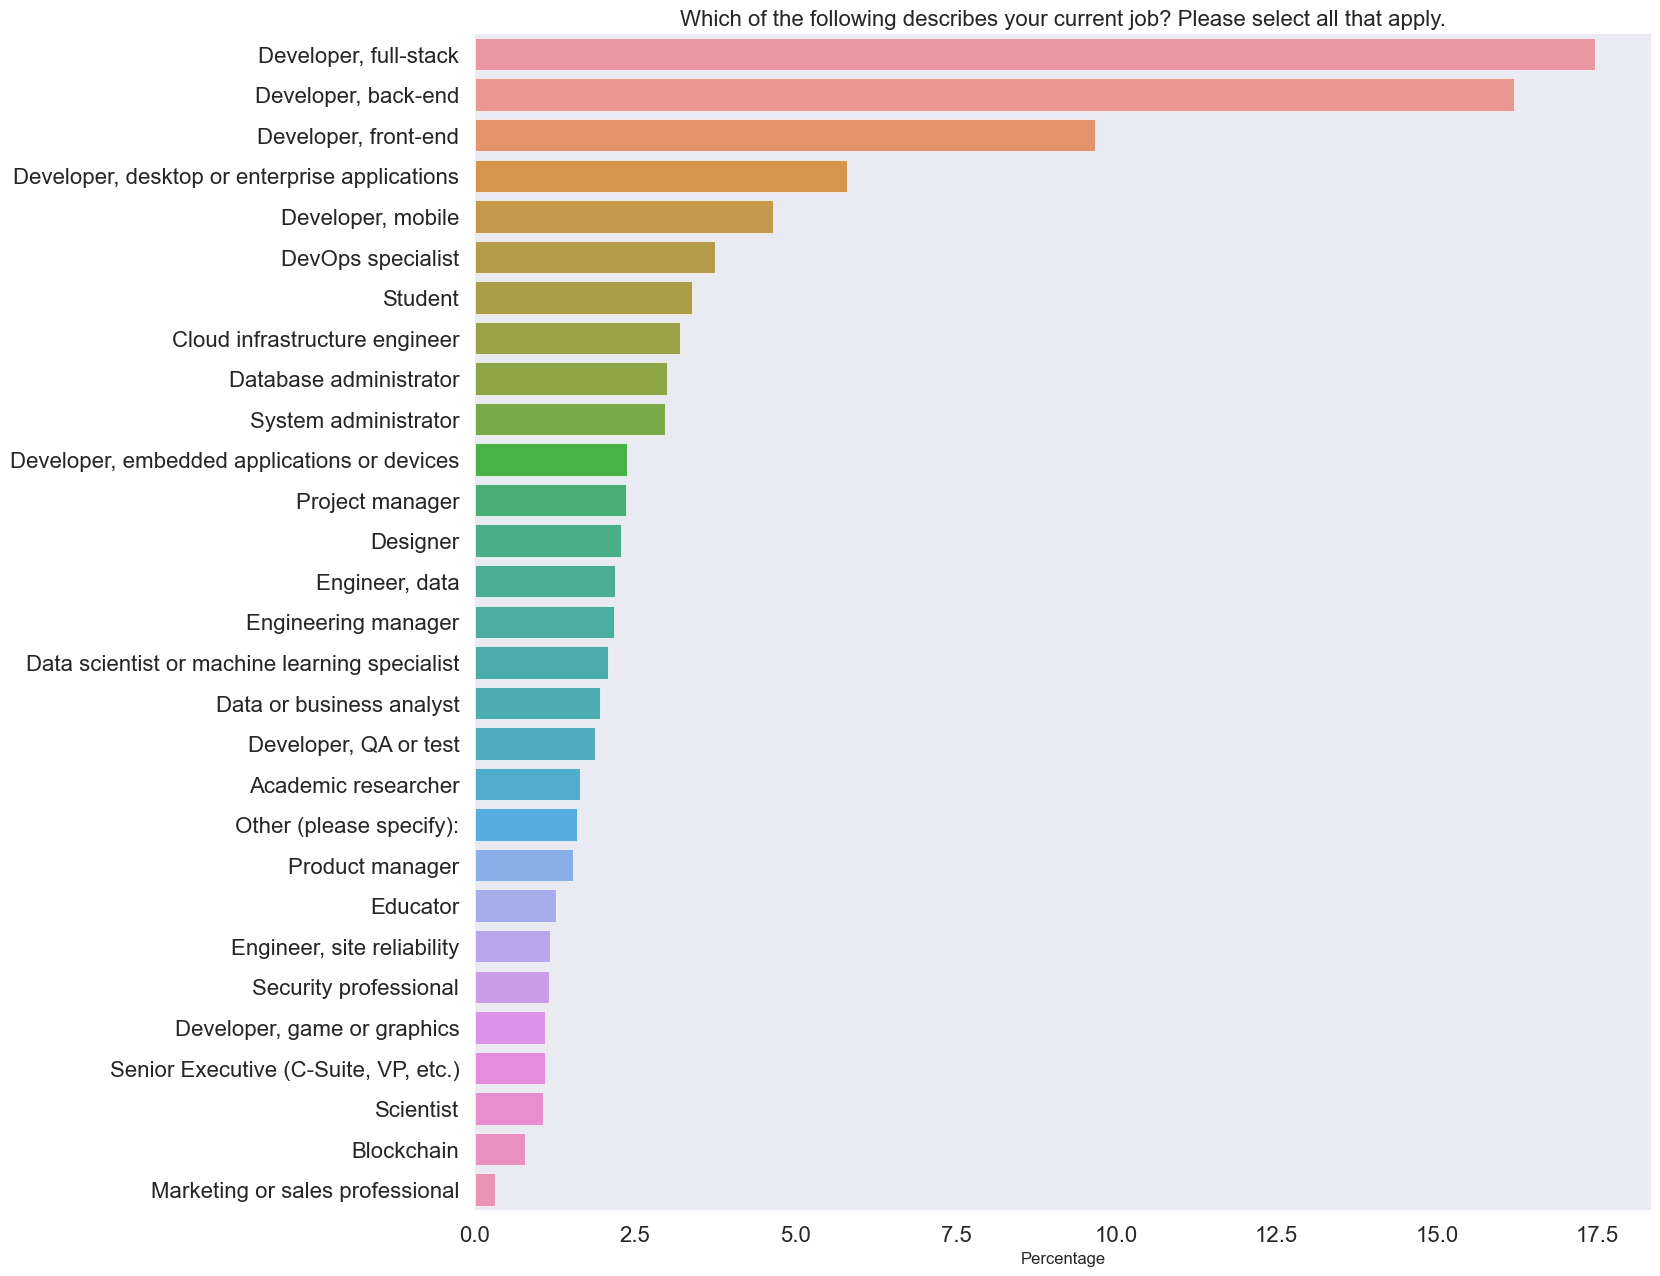

In [535]:
plt.figure(figsize = (12, 12))
sns.barplot(x = devtype_percentage.values, y = devtype_percentage.index)
plt.title(schema_raw['DevType'])
plt.xlabel('Percentage')
plt.ylabel(None)
plt.show()

ResponseId
2                                    JavaScript;TypeScript
3                        C#;C++;HTML/CSS;JavaScript;Python
4                             C#;JavaScript;SQL;TypeScript
5              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
6                                                  C++;Lua
                               ...                        
73264    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73265            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73266                   HTML/CSS;JavaScript;PHP;Python;SQL
73267                                        C#;Delphi;VBA
73268          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 70292, dtype: object

In [567]:
def split_multicolumn(Series):
    lab = []
    df = pd.DataFrame(False, columns = (set([lab.extend(x) for x in Series.dropna().str.split(';')])), index = Series.index)
    for idx, rep in Series.str.split(';').items():
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
    return df

In [667]:
def split_multicolumn(Series):
    lab = []
    [lab.extend(x) for x in Series.dropna().str.split(';')]
    df = pd.DataFrame(False, columns = set(lab), index = survey_df.index)
    for idx, rep in Series.str.split(';').items():
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True

    return df

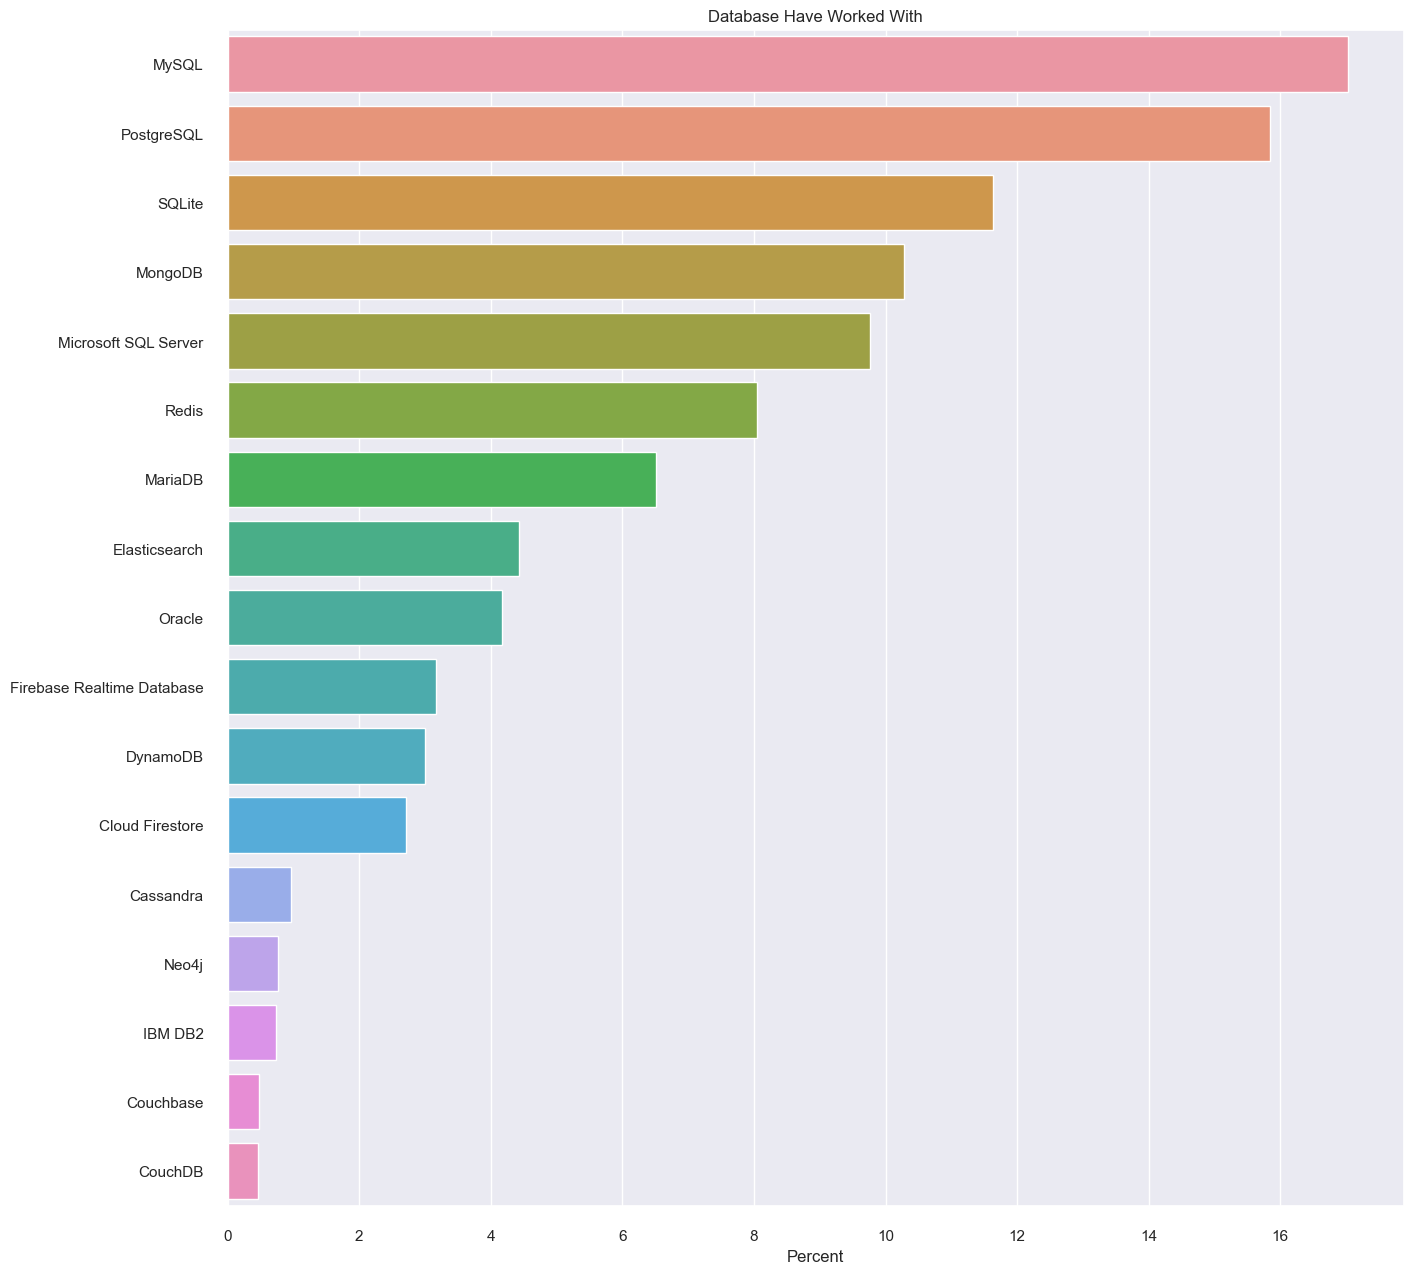

In [680]:
df = split_multicolumn(survey_raw_df['DatabaseHaveWorkedWith'])

mpl.rcParams['figure.figsize'] = (12,12)
score = df.sum().sort_values(ascending = False) / df.sum().sum() * 100
sns.barplot(x = score, y = score.index)
plt.xlabel('Percent')
plt.ylabel(None)
plt.title('Database Have Worked With')
plt.show()